In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from Modules.ShapeShadow import Ellipse, Sector, Mask
from Modules.Beamer import Spot
from Modules.JAW import JAW

In [7]:
load_dotenv()

DATA_PATH = os.getenv("DATA_PATH")
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(DATA_PATH)

In [9]:
jaw = JAW(DATA_PATH)

theta = 5.1
alpha = 75

spot_coor = Mask(jaw.data.x, jaw.data.y)
#spot_coor.rotate(5.1).translate(x_offset=0.0673, y_offset=-.4477)
spot_coor.translate(0, -0.32).rotate(theta)

spot = Spot(diameter=0.03, angle_incident=65)


sector0 = Sector(2*2.54, 90)
sector0.rotate(225+5.1)


Column names:
- Point #
- Z Align
- SigInt
- Tilt X
- Tilt Y
- Hardware OK
- MSE
- Thickness # 1 (nm)
- A
- B
- n of Cauchy Film @ 632.8 nm
- Fit OK
- x
- y


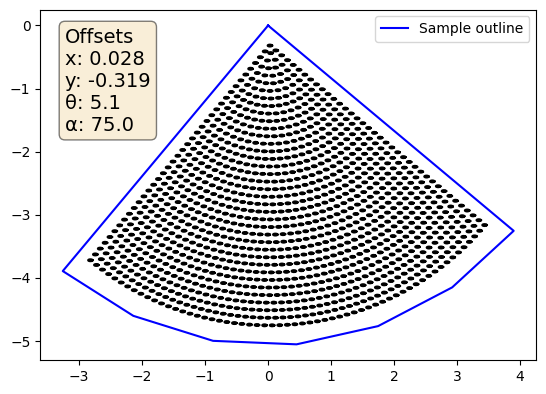

In [10]:
fig, ax = plt.subplots()
ax.plot(sector0.x, sector0.y, '-b', label="Sample outline")

for x, y in zip(spot_coor.x, spot_coor.y):
    ellipse = Ellipse(major=spot.elongation(), minor=spot.diameter)
    ellipse.translate(x, y)
    ax.plot(ellipse.x, ellipse.y, '-k')

textstr = '\n'.join((
    "Offsets",
    f"x: {spot_coor.x[0]:.3f}",
    f"y: {spot_coor.y[0]:.3f}",
    f"\u03B8: {theta:.1f}",
    f"\u03B1: {alpha:.1f}")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax.set_aspect('equal')
plt.legend()
plt.show()